In [1]:
import sklearn
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as seabornInstance 
import seaborn as sns
from scipy import stats 
%matplotlib inline
import xgboost as xg

In [2]:
df=pd.read_csv('consommation_électrique.csv')

In [3]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,State,ZipCode,BuildingAge
0,28,2015,SPS-District K-12,K-12 School,GRAHAM HILL ELEMENTARY SCHOOL (SPS-DISTRICT),SOUTHEAST,1961,1.0,2.0,56228,...,911659.0,542600.0,35.17,0.56,47.545701,-122.268584,5101 S GRAHAM ST,WA,98118.0,54
1,29,2015,NonResidential,Hotel,WATERTOWN HOTEL,NORTHEAST,2001,1.0,6.0,88592,...,2254751.0,1626149.0,102.08,1.04,47.659533,-122.317393,4242 ROOSEVELT WAY NE,WA,98105.0,14
2,31,2015,NonResidential,Other,SEATTLE HONDA,DOWNTOWN,1930,1.0,2.0,67224,...,1388775.0,0.0,9.68,0.06,47.614906,-122.330401,1017 OLIVE WAY,WA,98101.0,85
3,35,2015,NonResidential,Hotel,Hotel Five,DOWNTOWN,1978,1.0,5.0,68410,...,2276244.0,2065556.0,125.57,1.69,47.615870,-122.341980,2200 5TH AVE,WA,98121.0,37
4,37,2015,SPS-District K-12,K-12 School,JOHN HAY ELEMENTARY SCHOOL (SPS-DISTRICT),MAGNOLIA / QUEEN ANNE,1989,1.0,2.0,51582,...,1472609.0,0.0,10.27,0.08,47.633032,-122.352457,201 GARFIELD ST,WA,98109.0,26


In [4]:
list(df.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'Address',
 'State',
 'ZipCode',
 'BuildingAge']

### Feature Selection and Engineering  ¶


In [5]:
## Feature selection pour la consommation d'énergie

df_energy=df[['BuildingAge','BuildingType', 'PrimaryPropertyType','LargestPropertyUseType','Neighborhood','PropertyGFATotal','NumberofFloors','TotalGHGEmissions','SiteEUI(kBtu/sf)']]
df_energy

,BuildingAge,BuildingType,PrimaryPropertyType,LargestPropertyUseType,Neighborhood,PropertyGFATotal,NumberofFloors,TotalGHGEmissions,SiteEUI(kBtu/sf)
0,54,SPS-District K-12,K-12 School,K-12 School,SOUTHEAST,56228,2.0,35.17,25.100000
1,14,NonResidential,Hotel,Hotel,NORTHEAST,88592,6.0,102.08,66.900000
2,85,NonResidential,Other,Automobile Dealership,DOWNTOWN,67224,2.0,9.68,20.700000
3,37,NonResidential,Hotel,Hotel,DOWNTOWN,68410,5.0,125.57,90.500000
4,26,SPS-District K-12,K-12 School,K-12 School,MAGNOLIA / QUEEN ANNE,51582,2.0,10.27,26.700000
...,...,...,...,...,...,...,...,...,...
2182,2,NonResidential,Hotel,Hotel,LAKE UNION,126823,4.0,131.02,68.500000
2183,61,NonResidential,Warehouse,Non-Refrigerated Warehouse,GREATER DUWAMISH,52085,1.0,157.70,69.199997
2184,3,NonResidential,Other,Other - Recreation,NORTHEAST,72000,1.0,67.65,40.599998
2185,1,NonResidential,K-12 School,K-12 School,GREATER DUWAMISH,45000,3.0,9.24,29.000000


In [6]:
df_energy[['PropertyGFATotal']]=np.log(df_energy[['PropertyGFATotal']])

df_energy[['PropertyGFATotal']]

C:\Users\Tewod\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,PropertyGFATotal
0,10.937170
1,11.391797
2,11.115786
3,11.133274
4,10.850928
...,...
2182,11.750548
2183,10.860632
2184,11.184421
2185,10.714418


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


df_energy[['BuildingType', 'PrimaryPropertyType','LargestPropertyUseType','Neighborhood']] = df_energy[['BuildingType', 'PrimaryPropertyType','LargestPropertyUseType','Neighborhood']].apply(le.fit_transform)
df_energy[['BuildingType', 'PrimaryPropertyType','LargestPropertyUseType','Neighborhood']].head()

C:\Users\Tewod\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,BuildingType,PrimaryPropertyType,LargestPropertyUseType,Neighborhood
0,4,5,11,16
1,1,4,10,12
2,1,12,1,5
3,1,4,10,5
4,4,5,11,10


In [8]:
df_energy

,BuildingAge,BuildingType,PrimaryPropertyType,LargestPropertyUseType,Neighborhood,PropertyGFATotal,NumberofFloors,TotalGHGEmissions,SiteEUI(kBtu/sf)
0,54,4,5,11,16,10.937170,2.0,35.17,25.100000
1,14,1,4,10,12,11.391797,6.0,102.08,66.900000
2,85,1,12,1,5,11.115786,2.0,9.68,20.700000
3,37,1,4,10,5,11.133274,5.0,125.57,90.500000
4,26,4,5,11,10,10.850928,2.0,10.27,26.700000
...,...,...,...,...,...,...,...,...,...
2182,2,1,4,10,9,11.750548,4.0,131.02,68.500000
2183,61,1,26,19,8,10.860632,1.0,157.70,69.199997
2184,3,1,12,27,12,11.184421,1.0,67.65,40.599998
2185,1,1,5,11,8,10.714418,3.0,9.24,29.000000


### Distribution des données

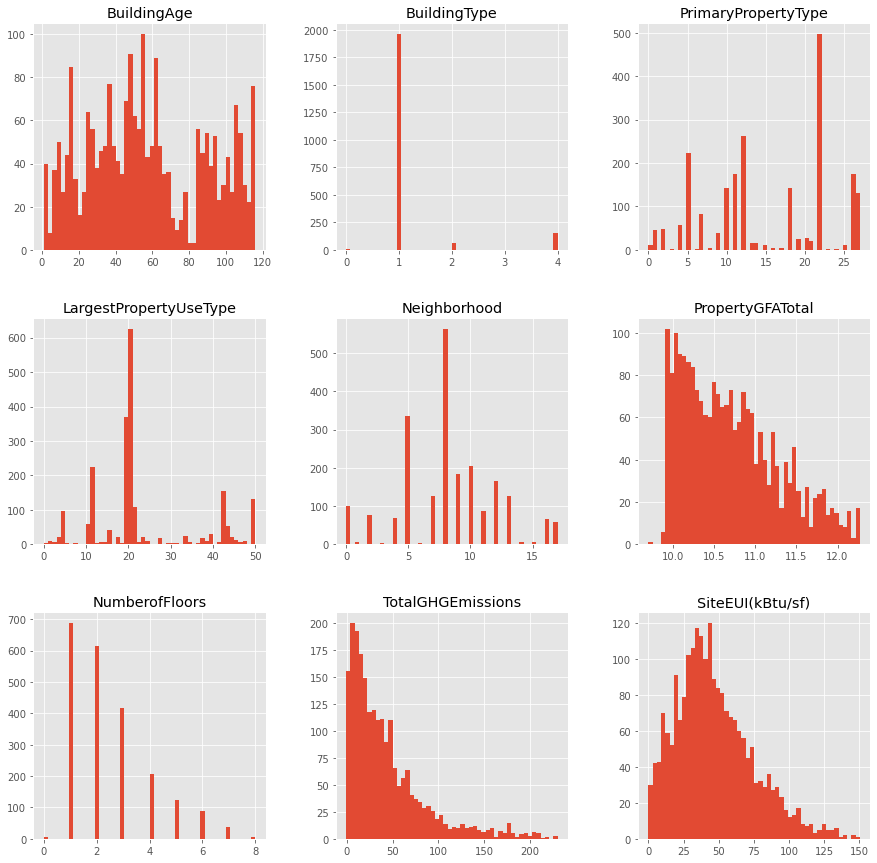

In [9]:
df_energy.hist(bins=50, figsize=(15,15))
plt.show()

## Classification des fonctionnalités et étiquette: Consomation d'energy: 'SiteEUI(kBtu/sf)'

In [11]:
# SiteEUI(kBtu/sf) est la quantité de chauffage et électricité qu'un bâtiment consomme, telle qu'elle est reflétée dans les factures de services publics.
# Il indique une mesure normalisée de la consommation d'énergie sur la surface d'un bâtiment plutôt qu'une consommation totale d'énergie

X = df_energy.drop(['SiteEUI(kBtu/sf)'], axis=1)
y = df_energy[['SiteEUI(kBtu/sf)']]

In [12]:
X

,BuildingAge,BuildingType,PrimaryPropertyType,LargestPropertyUseType,Neighborhood,PropertyGFATotal,NumberofFloors,TotalGHGEmissions
0,54,4,5,11,16,10.937170,2.0,35.17
1,14,1,4,10,12,11.391797,6.0,102.08
2,85,1,12,1,5,11.115786,2.0,9.68
3,37,1,4,10,5,11.133274,5.0,125.57
4,26,4,5,11,10,10.850928,2.0,10.27
...,...,...,...,...,...,...,...,...
2182,2,1,4,10,9,11.750548,4.0,131.02
2183,61,1,26,19,8,10.860632,1.0,157.70
2184,3,1,12,27,12,11.184421,1.0,67.65
2185,1,1,5,11,8,10.714418,3.0,9.24


In [14]:
y

,SiteEUI(kBtu/sf)
0,25.100000
1,66.900000
2,20.700000
3,90.500000
4,26.700000
...,...
2182,68.500000
2183,69.199997
2184,40.599998
2185,29.000000


### Diviser les données en données d'entraînement et de test

In [15]:
# Cette opération est important avant la normalisation des données afin d'éviter les fuites de données

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33,random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))


Entrainement: 1465 lignes,
Test: 722 lignes.



### Standardisation de la jeux d'entrainment

In [16]:
#  Redimensionner les caractéristiques d'entrée
from sklearn import preprocessing


Scaler = preprocessing.StandardScaler()

Scaler.fit(X_train)

X_train=Scaler.transform(X_train)

X_test= Scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)

In [17]:
X_train

,BuildingAge,BuildingType,PrimaryPropertyType,LargestPropertyUseType,Neighborhood,PropertyGFATotal,NumberofFloors,TotalGHGEmissions
0,0.879689,-0.311795,-1.301144,-0.950521,0.718705,-1.073227,-0.317719,-0.567318
1,-0.581296,-0.311795,0.100362,1.423620,0.182740,-0.896138,-0.317719,1.228195
2,-1.265161,-0.311795,0.864820,-0.238278,-2.229101,-0.751675,0.989748,-0.868649
3,-0.923229,-0.311795,-0.791506,-0.633969,0.718705,-0.751854,0.336015,-0.371511
4,0.599926,-0.311795,1.247050,-1.583625,0.182740,-0.134927,-0.317719,0.406406
...,...,...,...,...,...,...,...,...
1460,-1.234076,-0.311795,-0.409276,0.790516,-0.353225,1.121193,-0.317719,0.777700
1461,-0.115024,0.936235,-0.409276,-0.159140,0.450723,-0.742403,-0.971452,0.112465
1462,-0.332618,-0.311795,0.864820,-0.238278,0.450723,0.918521,0.989748,0.108077
1463,0.071484,-0.311795,1.374459,-0.317416,-0.085242,0.222331,-0.971452,1.456560


In [18]:
X_train.mean(axis=0)

BuildingAge              -4.857699e-17
BuildingType              3.402663e-17
PrimaryPropertyType       1.756653e-16
LargestPropertyUseType    5.329449e-17
Neighborhood              2.081005e-16
PropertyGFATotal         -2.562872e-15
NumberofFloors           -1.141673e-16
TotalGHGEmissions        -7.991332e-17
dtype: float64

In [19]:
X_train.std(axis=0)


BuildingAge               1.000341
BuildingType              1.000341
PrimaryPropertyType       1.000341
LargestPropertyUseType    1.000341
Neighborhood              1.000341
PropertyGFATotal          1.000341
NumberofFloors            1.000341
TotalGHGEmissions         1.000341
dtype: float64

In [20]:
X_test=pd.DataFrame(X_test, columns=X.columns)
X_test

,BuildingAge,BuildingType,PrimaryPropertyType,LargestPropertyUseType,Neighborhood,PropertyGFATotal,NumberofFloors,TotalGHGEmissions
0,-1.310348,-0.281202,-0.654445,-0.204605,0.775781,-0.607683,0.967441,-0.889975
1,1.590372,-0.281202,-1.804412,-1.548321,-0.023620,0.417768,0.967441,-0.866117
2,-0.093917,-0.281202,-0.398896,-0.120623,-0.023620,-0.783493,-0.990949,-0.998582
3,-0.374632,-0.281202,0.878846,-0.204605,-0.023620,-0.760862,-0.338152,-0.829335
4,0.872989,-0.281202,-0.015574,1.391057,1.042249,-1.183390,0.314644,-0.930237
...,...,...,...,...,...,...,...,...
717,1.216085,-0.281202,-0.398896,-0.120623,-0.023620,-0.901555,-0.990949,-0.579317
718,1.777515,-0.281202,0.878846,-0.204605,-0.823022,-0.548901,-0.338152,1.520484
719,-1.341538,-0.281202,-1.421090,-1.044427,0.242847,2.104672,2.925830,3.711991
720,-0.125108,-0.281202,-0.398896,0.047342,0.509314,-1.119772,0.314644,0.964281


In [21]:
y

,SiteEUI(kBtu/sf)
0,25.100000
1,66.900000
2,20.700000
3,90.500000
4,26.700000
...,...
2182,68.500000
2183,69.199997
2184,40.599998
2185,29.000000


## La répartition des fonctionnalités (Jeux d'entrainement)

<AxesSubplot:xlabel='TotalGHGEmissions', ylabel='Count'>

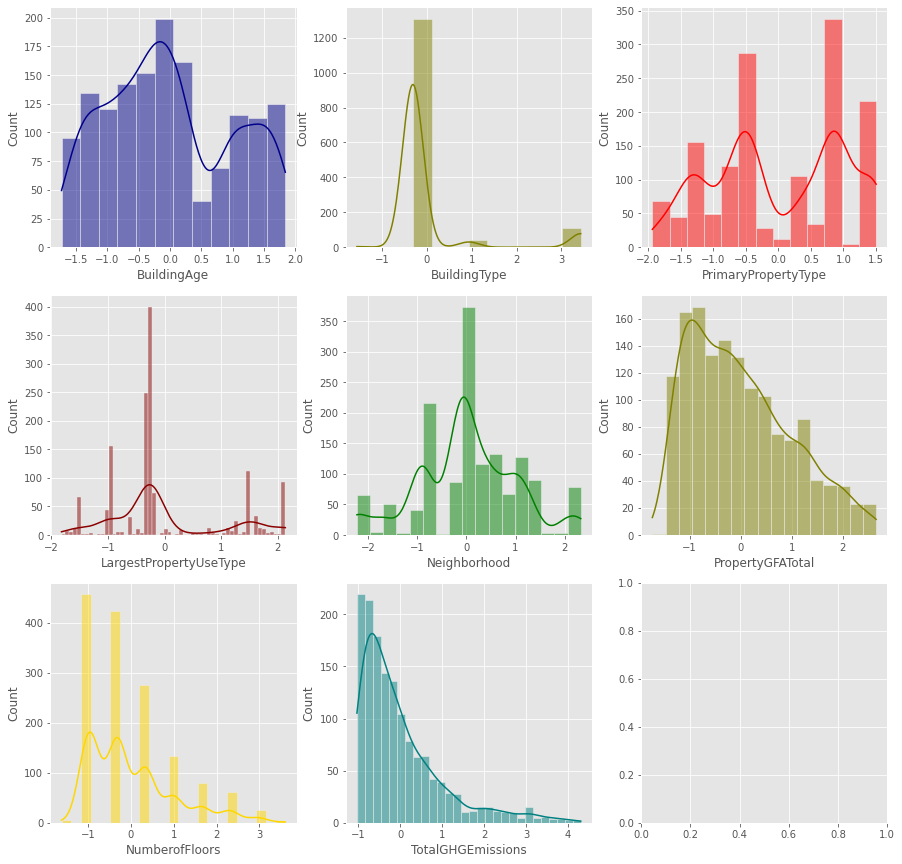

In [22]:

# On ne trouve pas de distribution normale dans les fonctionnalités

# Ils sont soit asymétriques, soit à distribution bimodale et multimodale


fig, axs = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(data=X_train, x="BuildingAge", kde=True, color="Darkblue", ax=axs[0,0])
sns.histplot(data=X_train, x="BuildingType", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=X_train, x="PrimaryPropertyType", kde=True, color="red", ax=axs[0,2])
sns.histplot(data=X_train, x="LargestPropertyUseType", kde=True, color="darkred", ax=axs[1, 0])
sns.histplot(data=X_train, x="Neighborhood", kde=True, color="Green", ax=axs[1, 1])
sns.histplot(data=X_train, x="PropertyGFATotal", kde=True, color="olive", ax=axs[1, 2])
sns.histplot(data=X_train, x="NumberofFloors", kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=X_train, x="TotalGHGEmissions", kde=True, color="teal", ax=axs[2, 1])

## La répartition des fonctionnalités (jeux de TEST)

<AxesSubplot:xlabel='TotalGHGEmissions', ylabel='Count'>

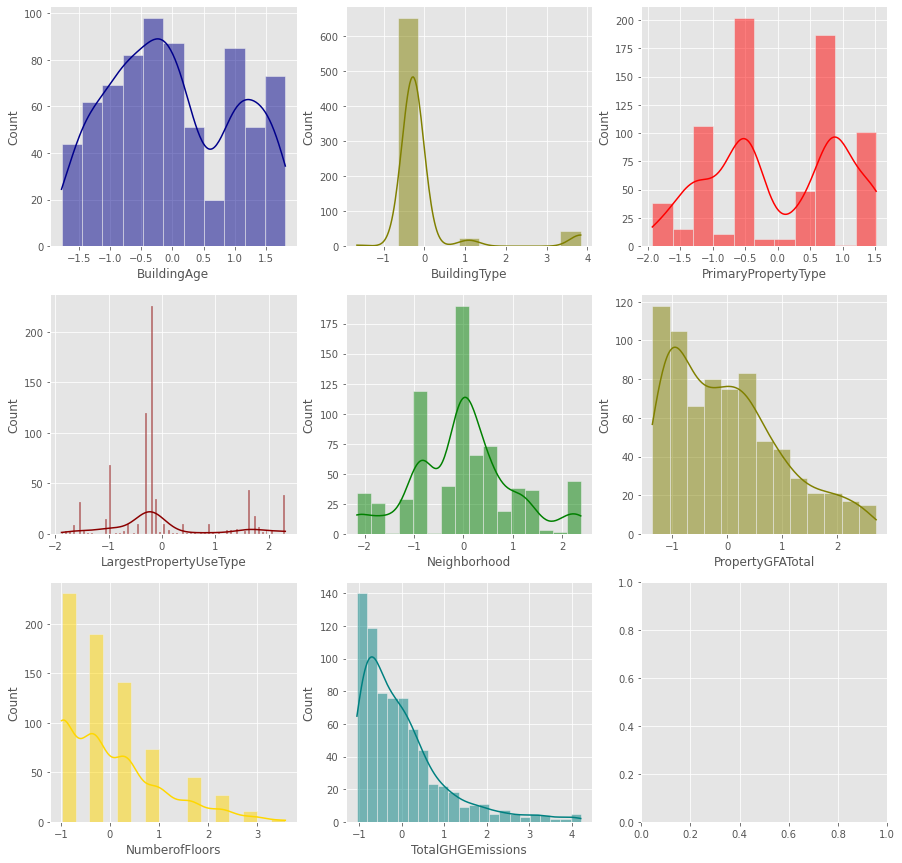

In [23]:
# On ne trouve pas de distribution normale dans les fonctionnalités TEST

# Ils sont soit asymétriques, soit à distribution bimodale et multimodale

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

sns.histplot(data=X_test, x="BuildingAge", kde=True, color="Darkblue", ax=axs[0,0])
sns.histplot(data=X_test, x="BuildingType", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=X_test, x="PrimaryPropertyType", kde=True, color="red", ax=axs[0,2])
sns.histplot(data=X_test, x="LargestPropertyUseType", kde=True, color="darkred", ax=axs[1, 0])
sns.histplot(data=X_test, x="Neighborhood", kde=True, color="Green", ax=axs[1, 1])
sns.histplot(data=X_test, x="PropertyGFATotal", kde=True, color="olive", ax=axs[1, 2])
sns.histplot(data=X_test, x="NumberofFloors", kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=X_test, x="TotalGHGEmissions", kde=True, color="teal", ax=axs[2, 1])

### Feature Selection: Méthode des écarts

In [24]:
# La méthode Variande est l'une des méthodes de sélection des fonctionnalités. Il élimine les fonctionnalités à faible variance

# En raison de la standardisation, la variance de la fonctionnalité est de 1

X_train.var()

BuildingAge               1.000683
BuildingType              1.000683
PrimaryPropertyType       1.000683
LargestPropertyUseType    1.000683
Neighborhood              1.000683
PropertyGFATotal          1.000683
NumberofFloors            1.000683
TotalGHGEmissions         1.000683
dtype: float64

In [25]:
# Nous voulons éliminer les fonctionnalités dont la variance est inférieure au seuil. Default est Zero
# En effet, aucune des fonctionnalités ne présente une variance inférieure. C'est pourquoi nous les gardons.


from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.02))
sel.fit(X_train)

print("Feature selection", sel.get_support())
print("Selected features:", list(X.columns[sel.get_support()]))
print("Removed features:", list(X.columns[~sel.get_support()]))

Feature selection [ True  True  True  True  True  True  True  True]
Selected features: ['BuildingAge', 'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'Neighborhood', 'PropertyGFATotal', 'NumberofFloors', 'TotalGHGEmissions']
Removed features: []


### Coefficient de corrélation de Pearson 

<AxesSubplot:>

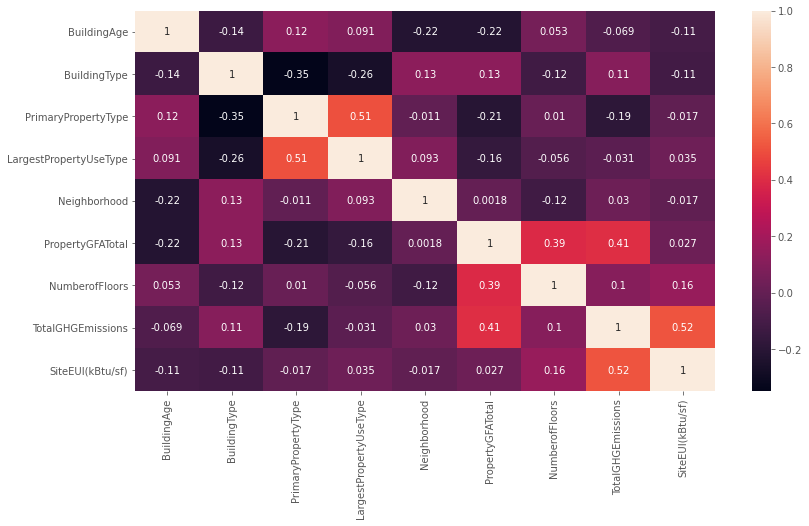

In [10]:
# Une autre façon d'observer la relation entre les variables et ces variables et la variable indépendante est le coefficient de corrélation.
# Nous pouvons noter que la relation linéaire n'est pas forte entre les variables et avec les variables indépendantes
cor=df_energy.corr()
plt.figure(figsize=(13,7))
sns.heatmap(cor,annot=True)

## Modélisation de consommation d'énergie: SiteEUI(kBtu/sf)

### Les modèles : LinearRegression ,KNeighborsRegressor, Gradient BoostingRegressor , RandomForestRegressor, XGBRegressor 

### Baseline Regression

In [29]:


# Sklearn regression algorithms

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
import xgboost as xg

# Sklearn regression model evaluation functions

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


# Construisez des modèles et comparez-les aux données d'entraînement à l'aide de MAE, RMSE and R2

models = [LinearRegression(),KNeighborsRegressor(), GradientBoostingRegressor(),RandomForestRegressor(),xg.XGBRegressor()]
for model in models:
    model.fit(X_train, y_train.values.ravel())
    predictions = model.predict(X_train)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_train, predictions))
    print("    RMSE", sqrt(mean_squared_error(y_train, predictions)))
    print("    R2", r2_score(y_train, predictions))

LinearRegression
    MAE 16.337453673212956
    RMSE 21.532985054408176
    R2 0.37910496347523126
KNeighborsRegressor
    MAE 12.110129705251467
    RMSE 16.256727848933505
    R2 0.6461037336162362
GradientBoostingRegressor
    MAE 9.830191429828211
    RMSE 13.82667573391187
    R2 0.743996875574686
RandomForestRegressor
    MAE 3.822017743503689
    RMSE 5.56826294580244
    R2 0.9584807804795548
XGBRegressor
    MAE 1.7750655384174474
    RMSE 2.593818227288355
    R2 0.9909907469437952


### Explorer les métriques d'évaluation sur l'ensemble de TEST

In [30]:
for model in models:
    model.fit(X_train, y_train.values.ravel())
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test, predictions))
    print("    MSE", mean_squared_error(y_test, predictions))
    print("    RMSE", sqrt(mean_squared_error(y_test, predictions)))
    print("    R2", r2_score(y_test, predictions))

LinearRegression
    MAE 16.302903951374066
    MSE 450.3260193827702
    RMSE 21.220886394841525
    R2 0.3972470838774004
KNeighborsRegressor
    MAE 15.377257583310248
    MSE 421.28201250476377
    RMSE 20.52515560244949
    R2 0.43612194139862004
GradientBoostingRegressor
    MAE 12.822470223516936
    MSE 305.0736129292148
    RMSE 17.46635660145569
    R2 0.5916647008823115
RandomForestRegressor
    MAE 10.999747863754894
    MSE 254.61326720855624
    RMSE 15.95660575462577
    R2 0.6592049255696821
XGBRegressor
    MAE 12.047573634732313
    MSE 288.72735648308293
    RMSE 16.991979180868924
    R2 0.6135438580185089


In [52]:
# La différence entre les résultats des ensembles de données d'entraînement et de test indique la présence de sur-apprentissage.

# Nous avons choisi GridSearchCV pour Hyperparameter Tunning afin d'améliorer les performances des modèles.

### Réglage des hyperparamètres: GridSearchCV de consomation d'énergie

In [31]:
# Nous avons choisi trois modèles pour l'optimisation des hyperparamètres
# GradientBoostingRegressor # Random Forest Regression # Xboost Regressor

## 1.GradientBoostingRegressor

In [53]:
from sklearn.model_selection import GridSearchCV

GBR = GradientBoostingRegressor(random_state=42)

# définition de la plage de paramètres
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,200,300],
                  'max_depth'    : [4,6,8,10]
                 }


grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, n_jobs=-1)

grid_GBR.fit(X_train, y_train.values.ravel())
 

GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [54]:
grid_GBR.best_params_

{'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.5}

In [55]:
Best_grid=grid_GBR.best_estimator_

### Explorer les métriques d'évaluation sur l'ensemble de test

In [56]:
print(" Résultats de Grid Search GradientBoostingRegressor  " )
y_pred=Best_grid.predict(X_test)
print("    MAE", mean_absolute_error(y_test, y_pred))
print("    MSE", mean_squared_error(y_test, y_pred))
print("    RMSE", sqrt(mean_squared_error(y_test, y_pred)))
print("    R2", r2_score(y_test, y_pred))
print("\n Les meilleurs paramètres parmi TOUS les paramètres recherchés:\n",grid_GBR.best_params_)

 Résultats de Grid Search GradientBoostingRegressor  
    MAE 10.507764734883446
    MSE 236.96424463483336
    RMSE 15.393642994263358
    R2 0.6828278106910122

 Les meilleurs paramètres parmi TOUS les paramètres recherchés:
 {'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.5}


## 2. Random Forest Regression

In [57]:
r = RandomForestRegressor(random_state=42)

param_rf  = {'max_features' : ['sqrt', 'log2'],
             'max_depth': [5, 15, 25, 50],
             'min_samples_split': [2, 5, 10],
             'bootstrap' : [True, False],
             'min_samples_leaf': [1,2,5,10]}


In [58]:
grid = GridSearchCV(estimator = r, param_grid = param_rf, n_jobs=-1)

grid.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 15, 25, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [59]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [60]:
Best_result=grid.best_estimator_
Best_result

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='log2',
                      random_state=42)

###  Explorer les métriques d'évaluation sur l'ensemble de test

In [87]:
print(" Résultats de Grid Search_Random Forest Regressor " )
y_prédites=Best_result.predict(X_test)
print("    MAE", mean_absolute_error(y_test, y_prédites))
print("    MSE", mean_squared_error(y_test, y_prédites))
print("    RMSE", sqrt(mean_squared_error(y_test, y_prédites)))
print("    R2", r2_score(y_test, y_prédites))

 Résultats de Grid Search_Random Forest Regressor 
    MAE 9.982459792120935
    MSE 224.5398467545638
    RMSE 14.984653708196388
    R2 0.6994576338215175


### 3. XGboost Regressor avec GridSearchCV

In [66]:

xgb1 = XGBRegressor(random_state=42)

parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,200,300,400],
                  'max_depth'    : [4,6,8,10]
                 }


xgb_grid = GridSearchCV(xgb1,
                        param_grid=parameters,
                        n_jobs = -1)

xgb_grid.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=42,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
        

In [67]:
xgb_grid.best_params_

{'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 400, 'subsample': 0.5}

In [68]:
Best_xgb_grid=xgb_grid.best_estimator_

### Explorer les métriques d'évaluation sur l'ensemble de test

In [69]:
print(" Résultats de Grid Search_XGboost Regressor " )
y_predict=Best_xgb_grid.predict(X_test)
print("    MAE", mean_absolute_error(y_test, y_predict))
print("    MSE", mean_squared_error(y_test, y_predict))
print("    RMSE", sqrt(mean_squared_error(y_test, y_predict)))
print("    R2", r2_score(y_test,  y_predict))
print("\n Les meilleurs paramètres parmi TOUS les paramètres recherchés:\n",xgb_grid.best_params_)

 Résultats de Grid Search_XGboost Regressor 
    MAE 9.845339831955057
    MSE 224.89767111608242
    RMSE 14.996588649292292
    R2 0.6989786926365051

 Les meilleurs paramètres parmi TOUS les paramètres recherchés:
 {'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 400, 'subsample': 0.5}


### Conclusion
#### Cependant, Le réglage des hyperparamètres a considérablement amélioré les performances de Gradient Boosting regressor

### Les modèles avec une meilleure performance est Random Forest Regressor

### Feature Importance: Consomation d'énergie

In [70]:
# RandomForestRegressor en utlisent 200 estimator
RFR = RandomForestRegressor(bootstrap=False, max_depth=50, max_features='log2',
                      random_state=42)
RFR .fit(X_train, y_train.values.ravel())


RandomForestRegressor(bootstrap=False, max_depth=50, max_features='log2',
                      random_state=42)

In [71]:
RFR.feature_importances_

array([0.09987633, 0.0276693 , 0.09014578, 0.10402585, 0.0552688 ,
       0.15145995, 0.04723737, 0.4243166 ])

Text(0.5, 0, "Random Forest Regressor Feature Importance sur consommation d'énergie")

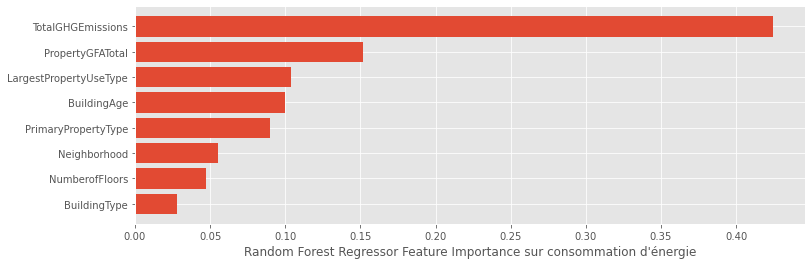

In [72]:
## Les émissions de CO2 représentent la plus haute importance
# D'un autre côté, le type de bâtiment montre la plus faible importance
# Nous gardons toutes les fonctionnalités pour l'étape de prédiction

sorted_idx = RFR.feature_importances_.argsort()
fig, ax = plt.subplots(figsize=(12,4))
plt.barh(X.columns[sorted_idx], RFR.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Regressor Feature Importance sur consommation d'énergie")

### Prédiction de consommation d'énergie en utlisent Random Forest Regressor

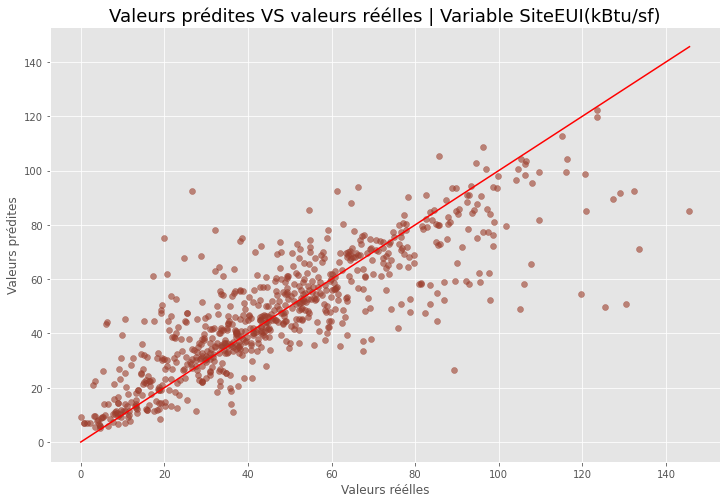

In [92]:
plot_pred_true(y_test,y_prédites, color="#9C3E2D", title="SiteEUI(kBtu/sf)")

In [ ]:
## Les valeurs prédites et réelles montrent une corrélation étroite jusqu'à ce que la valeur réelle atteigne 100. 
# Après cela, il semble qu'il y ait sous-prédiction.